Recommender System

Dede Anjar Permana


============================================================================







# import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
url = 'https://bit.ly/2IJjxoq'

data = pd.read_csv(url)
data.head()

,No_IDLagu,Judul_Lagu,Bait_Reff,NIM,Nama
0,1,Sedang Sayang Sayangnya,Kau Tepikan Kisah Cinta Kita\nSaat Ku Sedang S...,1301174120,Muhammad Rafii Danendra
1,2,Pura Pura Lupa,Jangan datang lagi cinta\nBagaimana aku bisa l...,1301174120,Muhammad Rafii Danendra
2,3,Awas Jatuh Cinta,Awas nanti jatuh cinta\nCinta kepada diriku\nJ...,1301174120,Muhammad Rafii Danendra
3,4,Bentuk Cinta,Rambut warna warni\nBagai gulali\nImut lucu wa...,1301174025,Rayhan Muhammad Auliarahman
4,5,Buta Hati,Selama ini aku salah mengartikan maksud di bal...,1301174025,Rayhan Muhammad Auliarahman


In [ ]:
DATA_NEW= pd.read_csv(url, usecols=["Judul_Lagu", "Bait_Reff"])
DATA_NEW.columns = ["judul_lagu", "Reff"]

DATA_NEW.head()

,judul_lagu,Reff
0,Sedang Sayang Sayangnya,Kau Tepikan Kisah Cinta Kita\nSaat Ku Sedang S...
1,Pura Pura Lupa,Jangan datang lagi cinta\nBagaimana aku bisa l...
2,Awas Jatuh Cinta,Awas nanti jatuh cinta\nCinta kepada diriku\nJ...
3,Bentuk Cinta,Rambut warna warni\nBagai gulali\nImut lucu wa...
4,Buta Hati,Selama ini aku salah mengartikan maksud di bal...


Proses Bag of word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
reff = []
reff = data['Bait_Reff'].values.tolist()
reff

['Kau Tepikan Kisah Cinta Kita\nSaat Ku Sedang Sayang Sayangnya\nKini Ku Tak Bisa Memaksa\nTapi Ku Harus Bilang, Hatiku Terluka',
 'Jangan datang lagi cinta\nBagaimana aku bisa lupa\nPadahal kau tahu keadaannya\nKau bukanlah untukku',
 'Awas nanti jatuh cinta\nCinta kepada diriku\nJangan-jangan kujodohmu\nKamu terlalu membenci\nMembenci diriku ini\nAwas nanti jatuh cinta padaku',
 'Rambut warna warni\nBagai gulali\nImut lucu walau tak terlalu tinggi\nPipi chuby dan kulit putih\nSenyum manis\nGigi kelinci\nMembuatku tersadar',
 'Selama ini aku salah mengartikan maksud di balik hatimu\nSelama ini aku anggap engkau benar-benar cinta kepadaku\nDan akhirnya ku tahu kau tak mencintaiku',
 'Terimalah lagu ini dari orang biasa\nTapi cintaku padamu luar biasa\nAku tak punya bunga aku tak punya harta\nYang kupunya hanyalah hati yang setia\nTulus padamu',
 "Kumau dia, 'tak mau yang lain\nHanya dia yang s'lalu ada kala susah dan senangku\nKumau dia, walau banyak perbedaan\nKuingin dia bahagia hany

In [ ]:
list_reff_perkata=[]
list_reff_perkata.append(data['Bait_Reff'].values.tolist())

print (list_reff_perkata)

[['Kau Tepikan Kisah Cinta Kita\nSaat Ku Sedang Sayang Sayangnya\nKini Ku Tak Bisa Memaksa\nTapi Ku Harus Bilang, Hatiku Terluka', 'Jangan datang lagi cinta\nBagaimana aku bisa lupa\nPadahal kau tahu keadaannya\nKau bukanlah untukku', 'Awas nanti jatuh cinta\nCinta kepada diriku\nJangan-jangan kujodohmu\nKamu terlalu membenci\nMembenci diriku ini\nAwas nanti jatuh cinta padaku', 'Rambut warna warni\nBagai gulali\nImut lucu walau tak terlalu tinggi\nPipi chuby dan kulit putih\nSenyum manis\nGigi kelinci\nMembuatku tersadar', 'Selama ini aku salah mengartikan maksud di balik hatimu\nSelama ini aku anggap engkau benar-benar cinta kepadaku\nDan akhirnya ku tahu kau tak mencintaiku', 'Terimalah lagu ini dari orang biasa\nTapi cintaku padamu luar biasa\nAku tak punya bunga aku tak punya harta\nYang kupunya hanyalah hati yang setia\nTulus padamu', "Kumau dia, 'tak mau yang lain\nHanya dia yang s'lalu ada kala susah dan senangku\nKumau dia, walau banyak perbedaan\nKuingin dia bahagia hanyalah 

In [ ]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(reff)

print (len(term_fit.vocabulary_))

808


In [ ]:
print (term_fit.vocabulary_) #mengurutkan berdasarkan urutan abjad kata 

{'kau': 279, 'tepikan': 721, 'kisah': 305, 'cinta': 129, 'kita': 306, 'saat': 583, 'ku': 309, 'sedang': 609, 'sayang': 596, 'sayangnya': 598, 'kini': 304, 'tak': 694, 'bisa': 102, 'memaksa': 413, 'tapi': 709, 'harus': 214, 'bilang': 100, 'hatiku': 217, 'terluka': 744, 'jangan': 247, 'datang': 148, 'lagi': 343, 'bagaimana': 32, 'aku': 10, 'lupa': 375, 'padahal': 521, 'tahu': 692, 'keadaannya': 284, 'bukanlah': 109, 'untukku': 788, 'awas': 30, 'nanti': 509, 'jatuh': 252, 'kepada': 295, 'diriku': 173, 'kujodohmu': 316, 'kamu': 268, 'terlalu': 741, 'membenci': 417, 'ini': 234, 'padaku': 522, 'rambut': 567, 'warna': 800, 'warni': 802, 'bagai': 31, 'gulali': 201, 'imut': 229, 'lucu': 372, 'walau': 797, 'tinggi': 769, 'pipi': 557, 'chuby': 128, 'dan': 139, 'kulit': 321, 'putih': 563, 'senyum': 646, 'manis': 388, 'gigi': 198, 'kelinci': 290, 'membuatku': 419, 'tersadar': 751, 'selama': 627, 'salah': 587, 'mengartikan': 453, 'maksud': 384, 'di': 160, 'balik': 38, 'hatimu': 218, 'anggap': 16, 'e

proses TFIDF

In [ ]:
reff_tf = reff[1] #memanggil kata pada index ke 1
print (reff_tf)

Jangan datang lagi cinta
Bagaimana aku bisa lupa
Padahal kau tahu keadaannya
Kau bukanlah untukku


In [ ]:
term_frequency = term_fit.transform([reff_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 10)	1
  (0, 32)	1
  (0, 102)	1
  (0, 109)	1
  (0, 129)	1
  (0, 148)	1
  (0, 247)	1
  (0, 279)	2
  (0, 284)	1
  (0, 343)	1
  (0, 375)	1
  (0, 521)	1
  (0, 692)	1
  (0, 788)	1


# membuat list kata-kata yanga ada pada column reff 

In [ ]:
list_bag_of_word = term_fit.get_feature_names() # 
list_bag_of_word

['12',
 'abadi',
 'ada',
 'adalah',
 'adanya',
 'adil',
 'agar',
 'air',
 'akan',
 'akhirnya',
 'aku',
 'akupun',
 'alasan',
 'andalkan',
 'aneh',
 'angan',
 'anggap',
 'angkasa',
 'angkat',
 'anjay',
 'antara',
 'anugrah',
 'apa',
 'apalagi',
 'apapun',
 'arti',
 'arungi',
 'asmara',
 'atapnya',
 'atas',
 'awas',
 'bagai',
 'bagaimana',
 'bahagia',
 'bahkan',
 'bahu',
 'baik',
 'baikmu',
 'balik',
 'banyak',
 'bapak',
 'bawa',
 'bawah',
 'bayanganmu',
 'bebaskan',
 'begini',
 'belajar',
 'belum',
 'benar',
 'bencana',
 'berada',
 'berakhir',
 'berarti',
 'berbagi',
 'berbicara',
 'berboncengan',
 'berbuat',
 'bercanda',
 'bercerita',
 'berdaya',
 'berdiri',
 'berdua',
 'berduka',
 'bergetar',
 'berharap',
 'berhenti',
 'beri',
 'berikan',
 'berjumpa',
 'berkala',
 'berkata',
 'berlabuh',
 'berlari',
 'berlindung',
 'bermimpi',
 'bernyanyi',
 'berpijar',
 'berpisah',
 'bersama',
 'bersamamu',
 'bersamanya',
 'bersandar',
 'bersayap',
 'bersedih',
 'bersinar',
 'bersyukurlah',
 'bertaha

# proses stemming dan stopword bahasa Indonesia

In [ ]:
# masih belum connect ke tfidf
"""
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

for i, kalimat in enumerate (data['Bait_Reff']):
    stop = stopword.remove(kalimat)
    print(i,stop + '\n')
"""

"\nfrom Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory\n\n\nfactory = StopWordRemoverFactory()\nstopword = factory.create_stop_word_remover()\n\nfor i, kalimat in enumerate (data['Bait_Reff']):\n    stop = stopword.remove(kalimat)\n    print(i,stop + '\n')\n"

# proses tfidf untuk semua list word yang ada pada reff

---



In [ ]:
dokumen = term_fit.transform(reff) 
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)

print (tfidf) #hasil manual dengan sistem pyhton

[4.96081317 4.96081317 3.25606508 4.96081317 4.96081317 4.55534806
 4.26766599 4.96081317 3.25606508 4.55534806 1.76214005 4.55534806
 4.55534806 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317
 4.96081317 4.96081317 4.55534806 4.96081317 3.7080502  4.96081317
 4.96081317 4.26766599 4.26766599 4.96081317 4.96081317 4.55534806
 4.96081317 4.55534806 4.26766599 4.96081317 4.96081317 4.96081317
 4.55534806 4.96081317 4.96081317 4.26766599 4.96081317 4.26766599
 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317
 4.04452244 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317
 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317
 4.55534806 4.96081317 4.96081317 4.96081317 4.96081317 4.26766599
 3.86220088 4.55534806 4.55534806 4.96081317 4.96081317 4.96081317
 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317 4.55534806
 3.45673577 4.55534806 4.26766599 4.96081317 4.96081317 4.96081317
 4.96081317 4.96081317 4.96081317 4.96081317 4.96081317 4.0445

In [ ]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(reff)
print (term_frequency_all)

  (0, 100)	1
  (0, 102)	1
  (0, 129)	1
  (0, 214)	1
  (0, 217)	1
  (0, 279)	1
  (0, 304)	1
  (0, 305)	1
  (0, 306)	1
  (0, 309)	3
  (0, 413)	1
  (0, 583)	1
  (0, 596)	1
  (0, 598)	1
  (0, 609)	1
  (0, 694)	1
  (0, 709)	1
  (0, 721)	1
  (0, 744)	1
  (1, 10)	1
  (1, 32)	1
  (1, 102)	1
  (1, 109)	1
  (1, 129)	1
  (1, 148)	1
  :	:
  (102, 306)	2
  (102, 343)	1
  (102, 349)	1
  (102, 357)	1
  (102, 363)	1
  (102, 402)	1
  (102, 487)	1
  (102, 511)	1
  (102, 544)	1
  (102, 549)	1
  (102, 696)	1
  (103, 10)	1
  (103, 41)	1
  (103, 139)	1
  (103, 304)	1
  (103, 343)	1
  (103, 348)	1
  (103, 357)	1
  (103, 485)	1
  (103, 503)	1
  (103, 559)	1
  (103, 576)	1
  (103, 615)	1
  (103, 623)	1
  (103, 694)	1


# memasukan list kata-kata (bag of word) ke dalam dataframe

In [ ]:
tabel_bag_of_word = pd.DataFrame(list_bag_of_word)

tabel_bag_of_word

,0
0,12
1,abadi
2,ada
3,adalah
4,adanya
...,...
803,wo
804,ya
805,yakin
806,yang


In [ ]:
tabel_bag_of_word ["tfidf"]= tfidf


# list kata dan Nilai tfidf dalam satu dataframe

In [ ]:
tabel_bag_of_word

,0,tfidf
0,12,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
1,abadi,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
2,ada,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
3,adalah,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
4,adanya,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
...,...,...
803,wo,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
804,ya,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
805,yakin,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."
806,yang,"(0, 788)\t0.29115696503160815\n (0, 692)\t0..."


# Kmeans proses
proses tfidf yang dimasukan ke dalam clustering kmeans 


In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    
)
tfidf.fit(data.Bait_Reff)
text = tfidf.transform(data.Bait_Reff)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


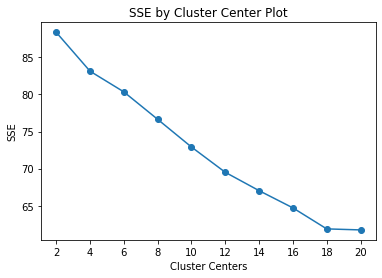

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

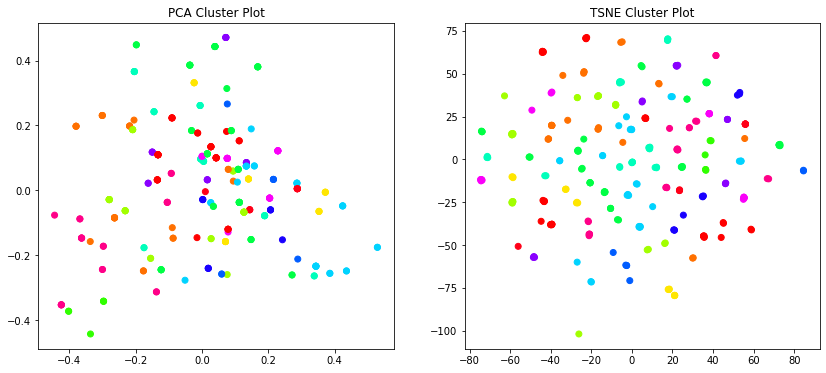

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    

# hasil kata-kata yang berada dalam cluster tertentu berdasarkan bobot dari tfidf

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
jangan,diriku,namun,ingin,beri,kan,yang,aku,jatuh,cinta

Cluster 1
lagi,waktu,tahu,untuk,aku,bisa,kau,tak,yang,hanya

Cluster 2
aku,dan,nanti,sampai,ku,walau,di,ke,indah,dia

Cluster 3
sudah,ku,bersama,kini,kau,ingin,pulang,sampai,kembali,lagi

Cluster 4
yang,di,aku,saja,waktu,semua,dari,untuk,tetap,kau

Cluster 5
apa,yang,ini,aku,tapi,pernah,hati,tak,kita,dari

Cluster 6
ini,hati,terjadi,dan,yang,ingin,kamu,tak,ku,semua

Cluster 7
kau,kan,dengan,ku,kamu,ini,tuk,dan,di,aku

Cluster 8
kita,untuk,kan,indah,kenangan,dalam,tak,dan,walau,warna

Cluster 9
slalu,aku,ku,selalu,saja,telah,ini,kamu,untuk,malam

Cluster 10
kau,di,mu,dunia,dengan,seperti,diriku,terjadi,tak,telah

Cluster 11
memang,indah,hari,bila,sini,ini,di,saat,kita,oh

Cluster 12
pergi,tlah,dirimu,tanpa,selalu,jadi,ku,akan,bukan,kau

Cluster 13
ini,waktu,walau,sini,kita,mu,di,masih,takkan,dunia


# clustering dengan menggunakan hierarchical algorithm

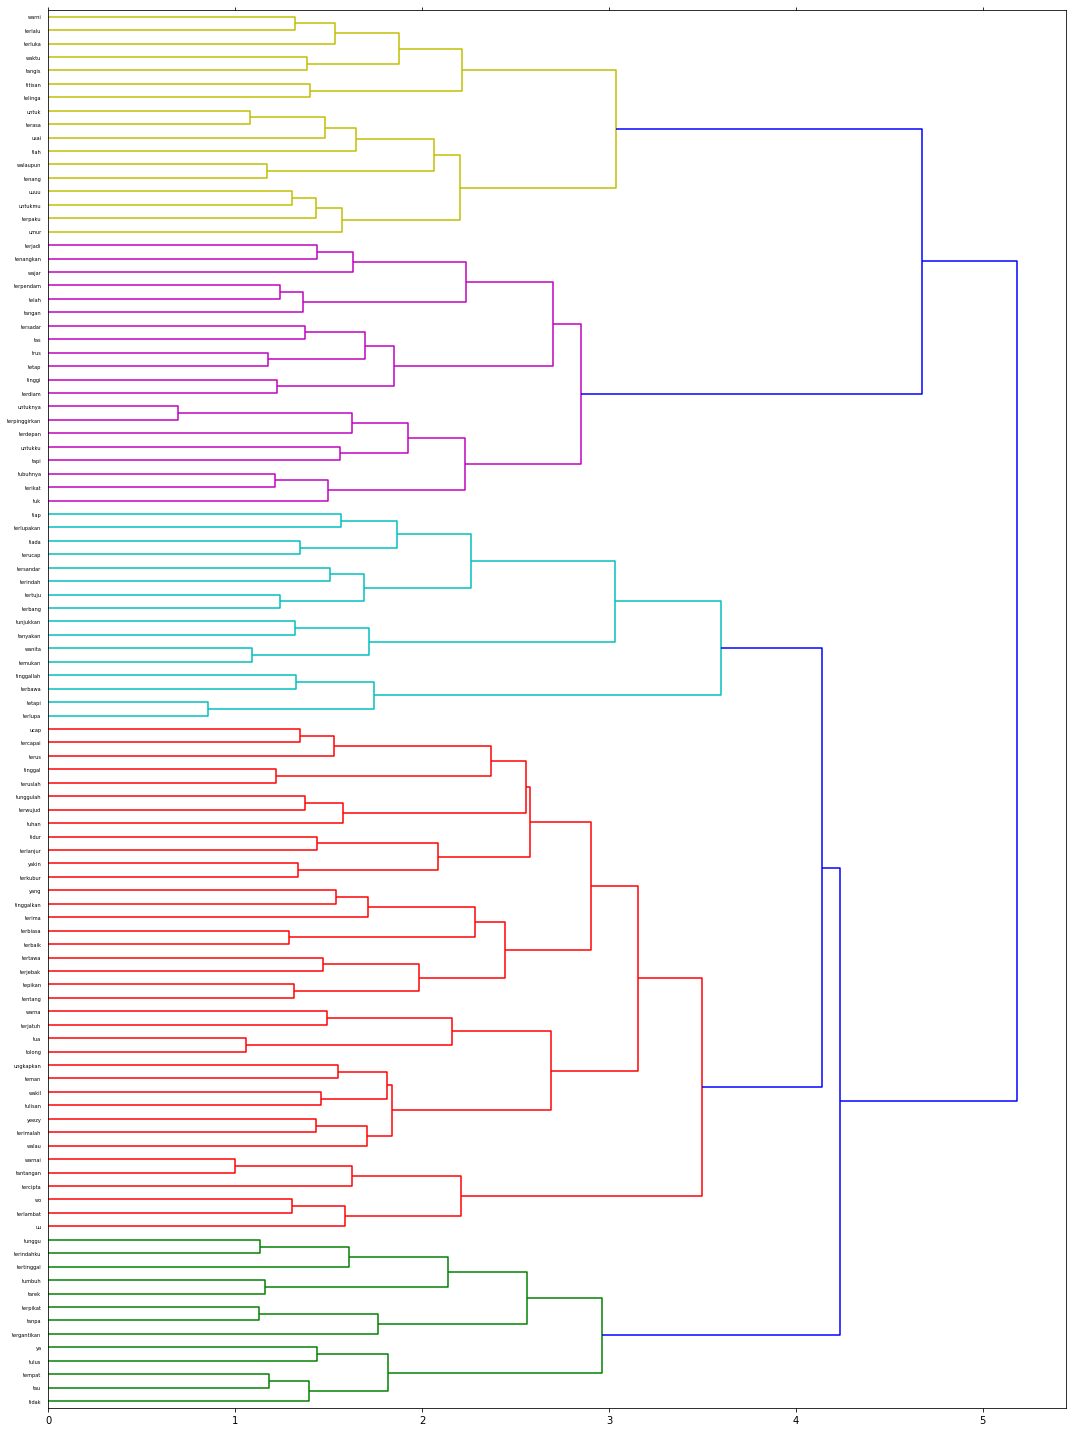

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(text)
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) # mendefinisikan linkage matrik menggunakan ward

fig, ax = plt.subplots(figsize=(15, 20)) # setting ukurannya
ax = dendrogram(linkage_matrix, orientation="right", labels=list_bag_of_word);

plt.tick_params(\
    axis= 'x',          # x-axis
    which='both',      # 
    bottom='off',      # 
    top='off',         # 
    labelbottom='off')

plt.tight_layout() #show dendogram


plt.savefig('ward_clusters.png', dpi=200) #menyimpan gambar sebagai ward_clusters